In [102]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a Connection Object to Database

In [103]:
path = r'...\SQL_Path\database.sqlite'

In [104]:
conn = sqlite3.connect(path)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'
                     """, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Salaries,Salaries,2,CREATE TABLE Salaries (\n Id INTEGER PRIMAR...


In [105]:
table = pd.read_sql(""" SELECT * FROM Salaries""",conn)
table

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0,400184.25,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737,182234.59,,326373.19,326373.19,2011,,San Francisco,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0,0,0,0,0.00,0.00,2014,,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,,San Francisco,


# 1. How many unique job titles are there?


In [106]:
Unique_Titles = pd.read_sql(""" SELECT COUNT(DISTINCT((JobTitle))) AS Unique_Jobs FROM Salaries""",conn)
Unique_Titles

,Unique_Jobs
0,2159


In [107]:
# Another Solution 
Unique_Titles = pd.read_sql(""" SELECT COUNT(DISTINCT(lower(JobTitle))) AS Unique_Jobs FROM Salaries Where JobTitle is not Null """,conn)
Unique_Titles

,Unique_Jobs
0,1637


# 2.What are the unique job titles?


In [108]:
Unique_Jobs = pd.read_sql("""SELECT DISTINCT(lower(JobTitle)) AS Title FROM Salaries ORDER BY Title  LIMIT 10 """,conn)
Unique_Jobs

,Title
0,account clerk
1,accountant
2,accountant i
3,accountant ii
4,accountant iii
5,accountant intern
6,accountant iv
7,"acpo,juvp, juv prob (sfers)"
8,acupuncturist
9,"adm, sfgh medical center"


# 3.    For which years is the data reported?


In [109]:
Years = pd.read_sql("""SELECT DISTINCT(year) FROM Salaries ORDER BY year  LIMIT 10 """,conn)
Years

,Year
0,2011
1,2012
2,2013
3,2014


# 4.    What's the yearly trend in the count of reported jobs?


In [110]:
jobs_year = Years = pd.read_sql("""SELECT year,count(*) AS Total_Jobs FROM Salaries GROUP BY year ORDER BY Total_Jobs DESC  """,conn)
jobs_year

,Year,Total_Jobs
0,2014,38123
1,2013,37606
2,2012,36766
3,2011,36159


# 5. Let's see if we can find any jobs related to 'data' or 'machine learning'


In [111]:
jobs_relate= pd.read_sql("""SELECT JobTitle AS Title FROM Salaries WHERE Title LIKE "%data%" OR Title LIKE "%machine learning%"   """,conn)
jobs_relate

,Title
0,SENIOR DATA ENTRY OPERATOR
1,Senior Data Entry Operator
2,Senior Data Entry Operator


# 6. What's the trend in average Total Pay over years?


In [112]:
jobs_relate_trend= pd.read_sql("""SELECT year,ROUND(AVG(TotalPay),2) AS Avg_Total  FROM Salaries GROUP BY year ORDER BY  AVG_TOTAL DESC""" ,conn)
jobs_relate_trend

,Year,Avg_Total
0,2013,77611.44
1,2014,75463.92
2,2012,74113.26
3,2011,71744.10


# 7. What are the top 5 jobs in terms of mean TotalPay in the recent year (2014)?


In [113]:
jobs_relate= pd.read_sql("""SELECT JobTitle AS Title,ROUND(AVG(TotalPay),2) AS AVG_TOTAL  FROM Salaries WHERE year=2014 GROUP BY Title ORDER BY  AVG_TOTAL DESC LIMIT 5""" ,conn)
jobs_relate

,Title,AVG_TOTAL
0,Chief Investment Officer,339653.70
1,Chief of Police,326716.76
2,"Chief, Fire Department",326233.44
3,"Gen Mgr, Public Trnsp Dept",294000.18
4,Dep Chf of Dept (Fire Dept),285575.79


# 8.What's the trend in Average TotalPay for the above 5 jobs?


In [114]:
trend = pd.read_sql("""SELECT Year,JobTitle as Title,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE Title IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 GROUP BY JobTitle ORDER BY AVG(TotalPay) DESC LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay) DESC""",conn)
trend

,Year,Title,Avg_TotalPay
0,2012,Chief of Police,321552.11
1,2012,"Chief, Fire Department",314759.60
2,2012,"Gen Mgr, Public Trnsp Dept",294000.17
3,2012,Dep Chf of Dept (Fire Dept),224253.94
4,2013,Chief of Police,339282.07
5,2013,"Chief, Fire Department",336922.01
6,2013,"Gen Mgr, Public Trnsp Dept",305307.89
7,2013,Dep Chf of Dept (Fire Dept),292964.78
8,2014,Chief Investment Officer,339653.70
9,2014,Chief of Police,326716.76


    Year                        Title  Avg_TotalPay
0   2012              Chief of Police     321552.11
1   2012       Chief, Fire Department     314759.60
2   2012   Gen Mgr, Public Trnsp Dept     294000.17
3   2012  Dep Chf of Dept (Fire Dept)     224253.94
4   2013              Chief of Police     339282.07
5   2013       Chief, Fire Department     336922.01
6   2013   Gen Mgr, Public Trnsp Dept     305307.89
7   2013  Dep Chf of Dept (Fire Dept)     292964.78
8   2014     Chief Investment Officer     339653.70
9   2014              Chief of Police     326716.76
10  2014       Chief, Fire Department     326233.44
11  2014   Gen Mgr, Public Trnsp Dept     294000.18
12  2014  Dep Chf of Dept (Fire Dept)     285575.79


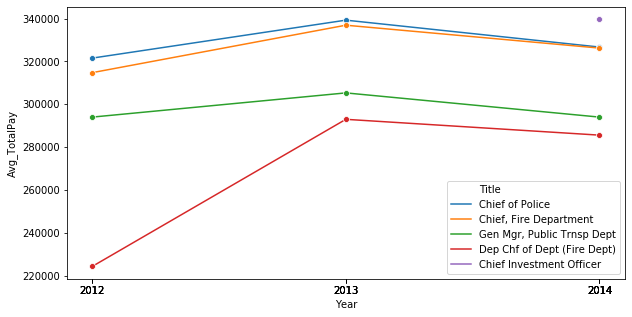

In [115]:
print(trend)
fig = plt.figure(figsize=(10,5))
sns.lineplot(x="Year",y="Avg_TotalPay",marker="o",data=trend,hue="Title")
plt.xticks(trend.Year);

# 9.What are the bottom 5 jobs in terms of mean TotalPay in the recent year (2014)?


In [116]:
jobs_relate_min= pd.read_sql("""SELECT JobTitle AS Title,ROUND(AVG(TotalPay),2) AS Avg_Total FROM Salaries WHERE year=2014 AND TotalPay>0 GROUP BY Title ORDER BY  AVG_TOTAL ASC LIMIT 5""" ,conn)
jobs_relate_min

,Title,Avg_Total
0,"BdComm Mbr, Grp2,M=$25/Mtg",325.00
1,"BdComm Mbr, Grp3,M=$50/Mtg",726.50
2,Special Examiner,1141.17
3,"BdComm Mbr, Grp5,M$100/Mo",1300.12
4,Cashier 3,2074.60


# 10.What's the trend in Average TotalPay for the above 5 jobs?


In [117]:
trend_min = pd.read_sql("""SELECT Year,JobTitle as Title ,ROUND(AVG(TotalPay),2) AS Avg_Total FROM Salaries WHERE Title IN 
(SELECT JobTitle FROM Salaries WHERE Year=2014 AND TotalPay>0 GROUP BY JobTitle ORDER BY AVG(TotalPay) ASC LIMIT 5) GROUP BY JobTitle,Year
ORDER BY Year,AVG(TotalPay) DESC""",conn)
trend_min

,Year,Title,Avg_Total
0,2012,Special Examiner,2373.52
1,2012,"BdComm Mbr, Grp5,M$100/Mo",1142.72
2,2012,"BdComm Mbr, Grp3,M=$50/Mtg",734.76
3,2012,"BdComm Mbr, Grp2,M=$25/Mtg",263.19
4,2013,"BdComm Mbr, Grp5,M$100/Mo",1210.54
5,2013,Special Examiner,1195.50
6,2013,"BdComm Mbr, Grp3,M=$50/Mtg",699.27
7,2013,"BdComm Mbr, Grp2,M=$25/Mtg",200.16
8,2014,Cashier 3,2074.60
9,2014,"BdComm Mbr, Grp5,M$100/Mo",1300.12


    Year                       Title  Avg_Total
0   2012            Special Examiner    2373.52
1   2012   BdComm Mbr, Grp5,M$100/Mo    1142.72
2   2012  BdComm Mbr, Grp3,M=$50/Mtg     734.76
3   2012  BdComm Mbr, Grp2,M=$25/Mtg     263.19
4   2013   BdComm Mbr, Grp5,M$100/Mo    1210.54
5   2013            Special Examiner    1195.50
6   2013  BdComm Mbr, Grp3,M=$50/Mtg     699.27
7   2013  BdComm Mbr, Grp2,M=$25/Mtg     200.16
8   2014                   Cashier 3    2074.60
9   2014   BdComm Mbr, Grp5,M$100/Mo    1300.12
10  2014            Special Examiner    1141.17
11  2014  BdComm Mbr, Grp3,M=$50/Mtg     691.90
12  2014  BdComm Mbr, Grp2,M=$25/Mtg     325.00


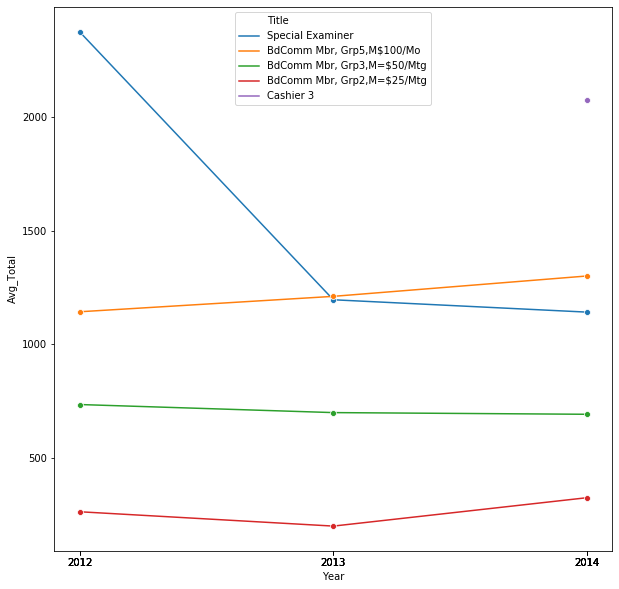

In [118]:
print(trend_min)
fig = plt.figure(figsize=(10,10))
sns.lineplot(x="Year",y="Avg_Total",marker="o",data=trend_min,hue="Title")
plt.xticks(trend.Year);

# 11.Which employee earned the most in terms of TotalPay by Year?


In [119]:
Employee= pd.read_sql("""SELECT EmployeeName AS Name,MAX(TotalPay) AS Max_Pay,year  FROM Salaries  GROUP BY year ORDER BY  Max_Pay DESC """ ,conn)
Employee

,Name,Max_Pay,Year
0,NATHANIEL FORD,567595.43,2011
1,David Shinn,471952.64,2014
2,Gary Altenberg,362844.66,2012
3,Samson Lai,347102.32,2013


# 12.Which employee earned the least in terms of TotalPay by Year?


In [120]:
Employee= pd.read_sql("""SELECT EmployeeName AS Name,MIN(TotalPay) AS Min_Pay,year  FROM Salaries  WHERE TotalPay>0 GROUP BY year ORDER BY  Min_Pay DESC """ ,conn)
Employee

,Name,Min_Pay,Year
0,Nereida Vega,5.56,2013
1,Sylvia R Jones,1.83,2014
2,Donald Clark,1.77,2012
3,JOE BROWN JR,0.30,2011


# Bonus:    Is there any pattern in salaries of Junior, Senior, and Chief employee titles acroess the board?


In [121]:
salary = pd.read_sql("""SELECT CASE WHEN LOWER(JobTitle) LIKE '%junior%' THEN 'junior' 
             WHEN LOWER(JobTitle) LIKE '%senior%' THEN 'senior' 
             WHEN LOWER(JobTitle) LIKE '%chief%' THEN 'chief' 
             ELSE 'others' END 
             AS Title,ROUND(AVG(TotalPay),2) AS Avg_TotalPay FROM Salaries WHERE TotalPay>0 GROUP BY Title ORDER BY AVG(TotalPay)""",conn)

In [122]:
salary

,Title,Avg_TotalPay
0,junior,27340.15
1,senior,74463.22
2,others,75053.37
3,chief,168134.11
